# DATA LOADING

In [1]:
#import required librairies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

import math

from sklearn import metrics #For accurary calculation
from sklearn.model_selection import train_test_split


#Librairies for Data Balancing
import sklearn
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


#Load the data into the pandas dataframe 
dataset = pd.read_csv("Accidents.csv")

#Check the number of rows and columns
print(dataset.shape)

#Display the 5 first rows
dataset.head(5)

(1780653, 32)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


# DATA MERGING

Importing the Vehicle dataset corresponding the the accident dataset due the fact that the dataset contains importatant features which are releveant for predicting the model for the target variable Accident Severity

In [2]:
# Load the 'vehicles' dataset
vehicles = pd.read_csv("Vehicles.csv", on_bad_lines='skip')

# Merge the datasets based on 'Accident_Index'
dataset = pd.merge(left=dataset, right=vehicles, on='Accident_Index', how='left')

# Check the number of rows and columns
print(dataset.shape)

# Display the 5 first rows
dataset.head(5)


(3144481, 53)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
3,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
4,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


In [3]:
# Check the number of rows
num_rows = dataset.shape[0]
print(f'The number of rows in the dataset is: {num_rows}')

The number of rows in the dataset is: 3144481


In [4]:
#Check if there are any duplicated rows
duplicated_rows = dataset[dataset.duplicated()]
print("number of duplicate rows:", duplicated_rows.shape)

number of duplicate rows: (0, 53)


The above shows there are no duplicated rows, if they were, we would have drop them

In [5]:
#Check if there are any missing values
print("Find below the missing values of each field")
print(dataset.isnull().sum())

Find below the missing values of each field
Accident_Index                                      0
Location_Easting_OSGR                             225
Location_Northing_OSGR                            225
Longitude                                         225
Latitude                                          225
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              240
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                           


The field with the highest null values count is LSOA_of_Accident_Location  with 213695 missing values. 
However,the number of rows in the dataset is: 3144481 


In [6]:
# Calculate the percentage of null values in each column
null_percentage = (dataset.isnull().sum() / len(dataset)) * 100

# Print the percentage of null values for each column
print("Percentage of null values in each column:")
print(null_percentage)

# Check if any column has null values exceeding 5%
columns_with_high_nulls = null_percentage[null_percentage > 5].index

if len(columns_with_high_nulls) > 0:
    print("\nColumns with more than 5% null values:")
    print(columns_with_high_nulls)
    
    # Decide whether to perform mean imputation or delete rows
    for column in columns_with_high_nulls:
        if null_percentage[column] <= 5:
            # Perform mean imputation
            dataset[column].fillna(dataset[column].mean(), inplace=True)
            print(f"Deleted rows with null values in {column}")
        else:
            # Delete rows with null values
            dataset.dropna(subset=[column], inplace=True)
            print(f"  Mean imputation for {column}")

# Display the 5 first rows after imputation/deletion
dataset.head(5)


Percentage of null values in each column:
Accident_Index                                 0.000000
Location_Easting_OSGR                          0.007155
Location_Northing_OSGR                         0.007155
Longitude                                      0.007155
Latitude                                       0.007155
Police_Force                                   0.000000
Accident_Severity                              0.000000
Number_of_Vehicles                             0.000000
Number_of_Casualties                           0.000000
Date                                           0.000000
Day_of_Week                                    0.000000
Time                                           0.007632
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
1st_Road_Class                                 0.000000
1st_Road_Number                                0.000000
Road_Type                                      0.000000
Speed_

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
3,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
4,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


Between on our column vissing values, Since we have only 'LSOA_of_Accident_Location' fields with a total of missing values silighty above 5% and not close to 10%, we will go with dopping the missing values rows instead of mean imputation

In [7]:
#drop missing values
dataset = dataset.dropna()
print(dataset.isnull().sum())

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

We see we have no more null values

In [8]:
#Check the number of rows and columns after mising values handling
print(dataset.shape)

(2799585, 53)


# DATASET FILTERING DUE TO MEMORY ERRORS

Looking at the fact that we have a really large dataset from the year 2005 to 2015 about 3 million of records. Therefore to prevent memorry errors we will retrieve a dasatet from the raw dataset that contains records for the January 2005 period

In [9]:

dataset['Date'] = pd.to_datetime(dataset['Date'], format="%d/%m/%Y")

# Filter the dataset for January 2005
january_2005_data = dataset[(dataset['Date'].dt.year == 2005) & (dataset['Date'].dt.month == 1)]

# Verify the new shape of the dataset
print("New shape after filtering for January 2005:", january_2005_data.shape)


New shape after filtering for January 2005: (27871, 53)


In [10]:
january_2005_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,2005-01-04,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,2005-01-05,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,2005-01-06,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
3,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,2005-01-06,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
4,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,2005-01-07,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


In [11]:
january_2005_data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_C

Given the amount of columns (50) presented by our actual dataset, we will conduct a feature selection in order to not have irrelevant fields/columns/features that cant contribute to our model predicting Accident occuring in a urban or rural area

# FEATURE SELECTION

In [12]:
# Creation a new DataFrame ("Dataset1") with potential features for predicting accident occuring in a urban or rural area
dataset1 = january_2005_data[[
    'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Time', 'Road_Type', 'Speed_limit', 'Light_Conditions', 
    'Weather_Conditions', 'Road_Surface_Conditions','Longitude', 'Latitude', 'Vehicle_Type', 
    'Towing_and_Articulation','Vehicle_Location-Restricted_Lane', 'Junction_Control', 'Skidding_and_Overturning', 
    'Hit_Object_in_Carriageway','Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', 'Sex_of_Driver', 
    'Age_of_Driver', 'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Accident_Severity',
     'Urban_or_Rural_Area'  # Include the target variable
]]

# Display the first few rows of the new dataset
dataset1.head()


,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Longitude,...,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Urban_or_Rural_Area
0,1,1,3,17:42,6,30,1,2,2,-0.191170,...,0.0,0.0,0.0,0.0,2.0,74.0,-1.0,-1.0,2,1
1,1,1,4,17:36,3,30,4,1,1,-0.211708,...,0.0,0.0,0.0,0.0,1.0,42.0,8268.0,3.0,3,1
2,2,1,5,00:15,6,30,4,1,1,-0.206458,...,0.0,4.0,0.0,0.0,1.0,35.0,8300.0,5.0,3,1
3,2,1,5,00:15,6,30,4,1,1,-0.206458,...,0.0,0.0,0.0,0.0,1.0,62.0,1762.0,6.0,3,1
4,1,1,6,10:35,6,30,1,1,1,-0.173862,...,0.0,0.0,0.0,0.0,2.0,49.0,1769.0,4.0,3,1


# DATA EXPLORATION / VISUALISATION

In [13]:
print("Shape of our working dataset:", dataset1.shape)
print("       ")
print("Columns Overview of our working dataset:", dataset1.columns)

Shape of our working dataset: (27871, 25)
       
Columns Overview of our working dataset: Index(['Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Time',
       'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Longitude', 'Latitude', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Location-Restricted_Lane',
       'Junction_Control', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', 'Sex_of_Driver', 'Age_of_Driver',
       'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Accident_Severity',
       'Urban_or_Rural_Area'],
      dtype='object')


In [14]:
#Check the types of data

print(dataset1.dtypes)

Number_of_Vehicles                    int64
Number_of_Casualties                  int64
Day_of_Week                           int64
Time                                 object
Road_Type                             int64
Speed_limit                           int64
Light_Conditions                      int64
Weather_Conditions                    int64
Road_Surface_Conditions               int64
Longitude                           float64
Latitude                            float64
Vehicle_Type                        float64
Towing_and_Articulation             float64
Vehicle_Location-Restricted_Lane    float64
Junction_Control                      int64
Skidding_and_Overturning            float64
Hit_Object_in_Carriageway           float64
Vehicle_Leaving_Carriageway         float64
Hit_Object_off_Carriageway          float64
Sex_of_Driver                       float64
Age_of_Driver                       float64
Engine_Capacity_(CC)                float64
Age_of_Vehicle                  

In [15]:
# Convert 'Time' to numeric format (total minutes from midnight)
dataset1['Time'] = pd.to_datetime(dataset1['Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(dataset1['Time'], format='%H:%M').dt.minute
dataset1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_20208\2552828956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Time'] = pd.to_datetime(dataset1['Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(dataset1['Time'], format='%H:%M').dt.minute


,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Longitude,...,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Urban_or_Rural_Area
0,1,1,3,1062,6,30,1,2,2,-0.191170,...,0.0,0.0,0.0,0.0,2.0,74.0,-1.0,-1.0,2,1
1,1,1,4,1056,3,30,4,1,1,-0.211708,...,0.0,0.0,0.0,0.0,1.0,42.0,8268.0,3.0,3,1
2,2,1,5,15,6,30,4,1,1,-0.206458,...,0.0,4.0,0.0,0.0,1.0,35.0,8300.0,5.0,3,1
3,2,1,5,15,6,30,4,1,1,-0.206458,...,0.0,0.0,0.0,0.0,1.0,62.0,1762.0,6.0,3,1
4,1,1,6,635,6,30,1,1,1,-0.173862,...,0.0,0.0,0.0,0.0,2.0,49.0,1769.0,4.0,3,1


In [16]:
# Generate descriptive statistics
dataset1.describe()

,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Longitude,...,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Urban_or_Rural_Area
count,27871.000000,27871.000000,27871.000000,27871.000000,27871.000000,27871.000000,27871.000000,27871.000000,27871.000000,27871.000000,...,27871.000000,27871.00000,27871.000000,27871.000000,27871.000000,27871.000000,27871.000000,27871.000000,27871.000000,27871.000000
mean,2.136307,1.427469,4.015895,845.804851,5.087403,40.396111,2.554663,1.876359,1.531090,-1.330435,...,0.232823,0.31348,0.410678,0.611137,1.383660,33.194826,1293.681999,4.478490,2.868717,1.363460
std,0.930355,0.866287,1.948420,305.234532,1.677700,14.717075,1.852649,1.902673,0.633782,1.282071,...,0.711992,1.63073,1.449836,2.145811,0.589725,18.889188,1571.874771,5.197923,0.375163,0.481004
min,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,-1.000000,-6.310469,...,0.000000,-1.00000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,610.000000,3.000000,30.000000,1.000000,1.000000,1.000000,-2.210399,...,0.000000,0.00000,0.000000,0.000000,1.000000,21.000000,-1.000000,-1.000000,3.000000,1.000000
50%,2.000000,1.000000,4.000000,880.000000,6.000000,30.000000,1.000000,1.000000,1.000000,-1.375799,...,0.000000,0.00000,0.000000,0.000000,1.000000,33.000000,1343.000000,4.000000,3.000000,1.000000
75%,2.000000,2.000000,6.000000,1070.000000,6.000000,60.000000,4.000000,2.000000,2.000000,-0.235234,...,0.000000,0.00000,0.000000,0.000000,2.000000,45.000000,1796.000000,8.000000,3.000000,2.000000
max,11.000000,17.000000,7.000000,1439.000000,9.000000,70.000000,7.000000,9.000000,5.000000,1.754908,...,5.000000,12.00000,8.000000,10.000000,3.000000,95.000000,16123.000000,47.000000,3.000000,2.000000


### DATA ANALYSIS (Visualisations)

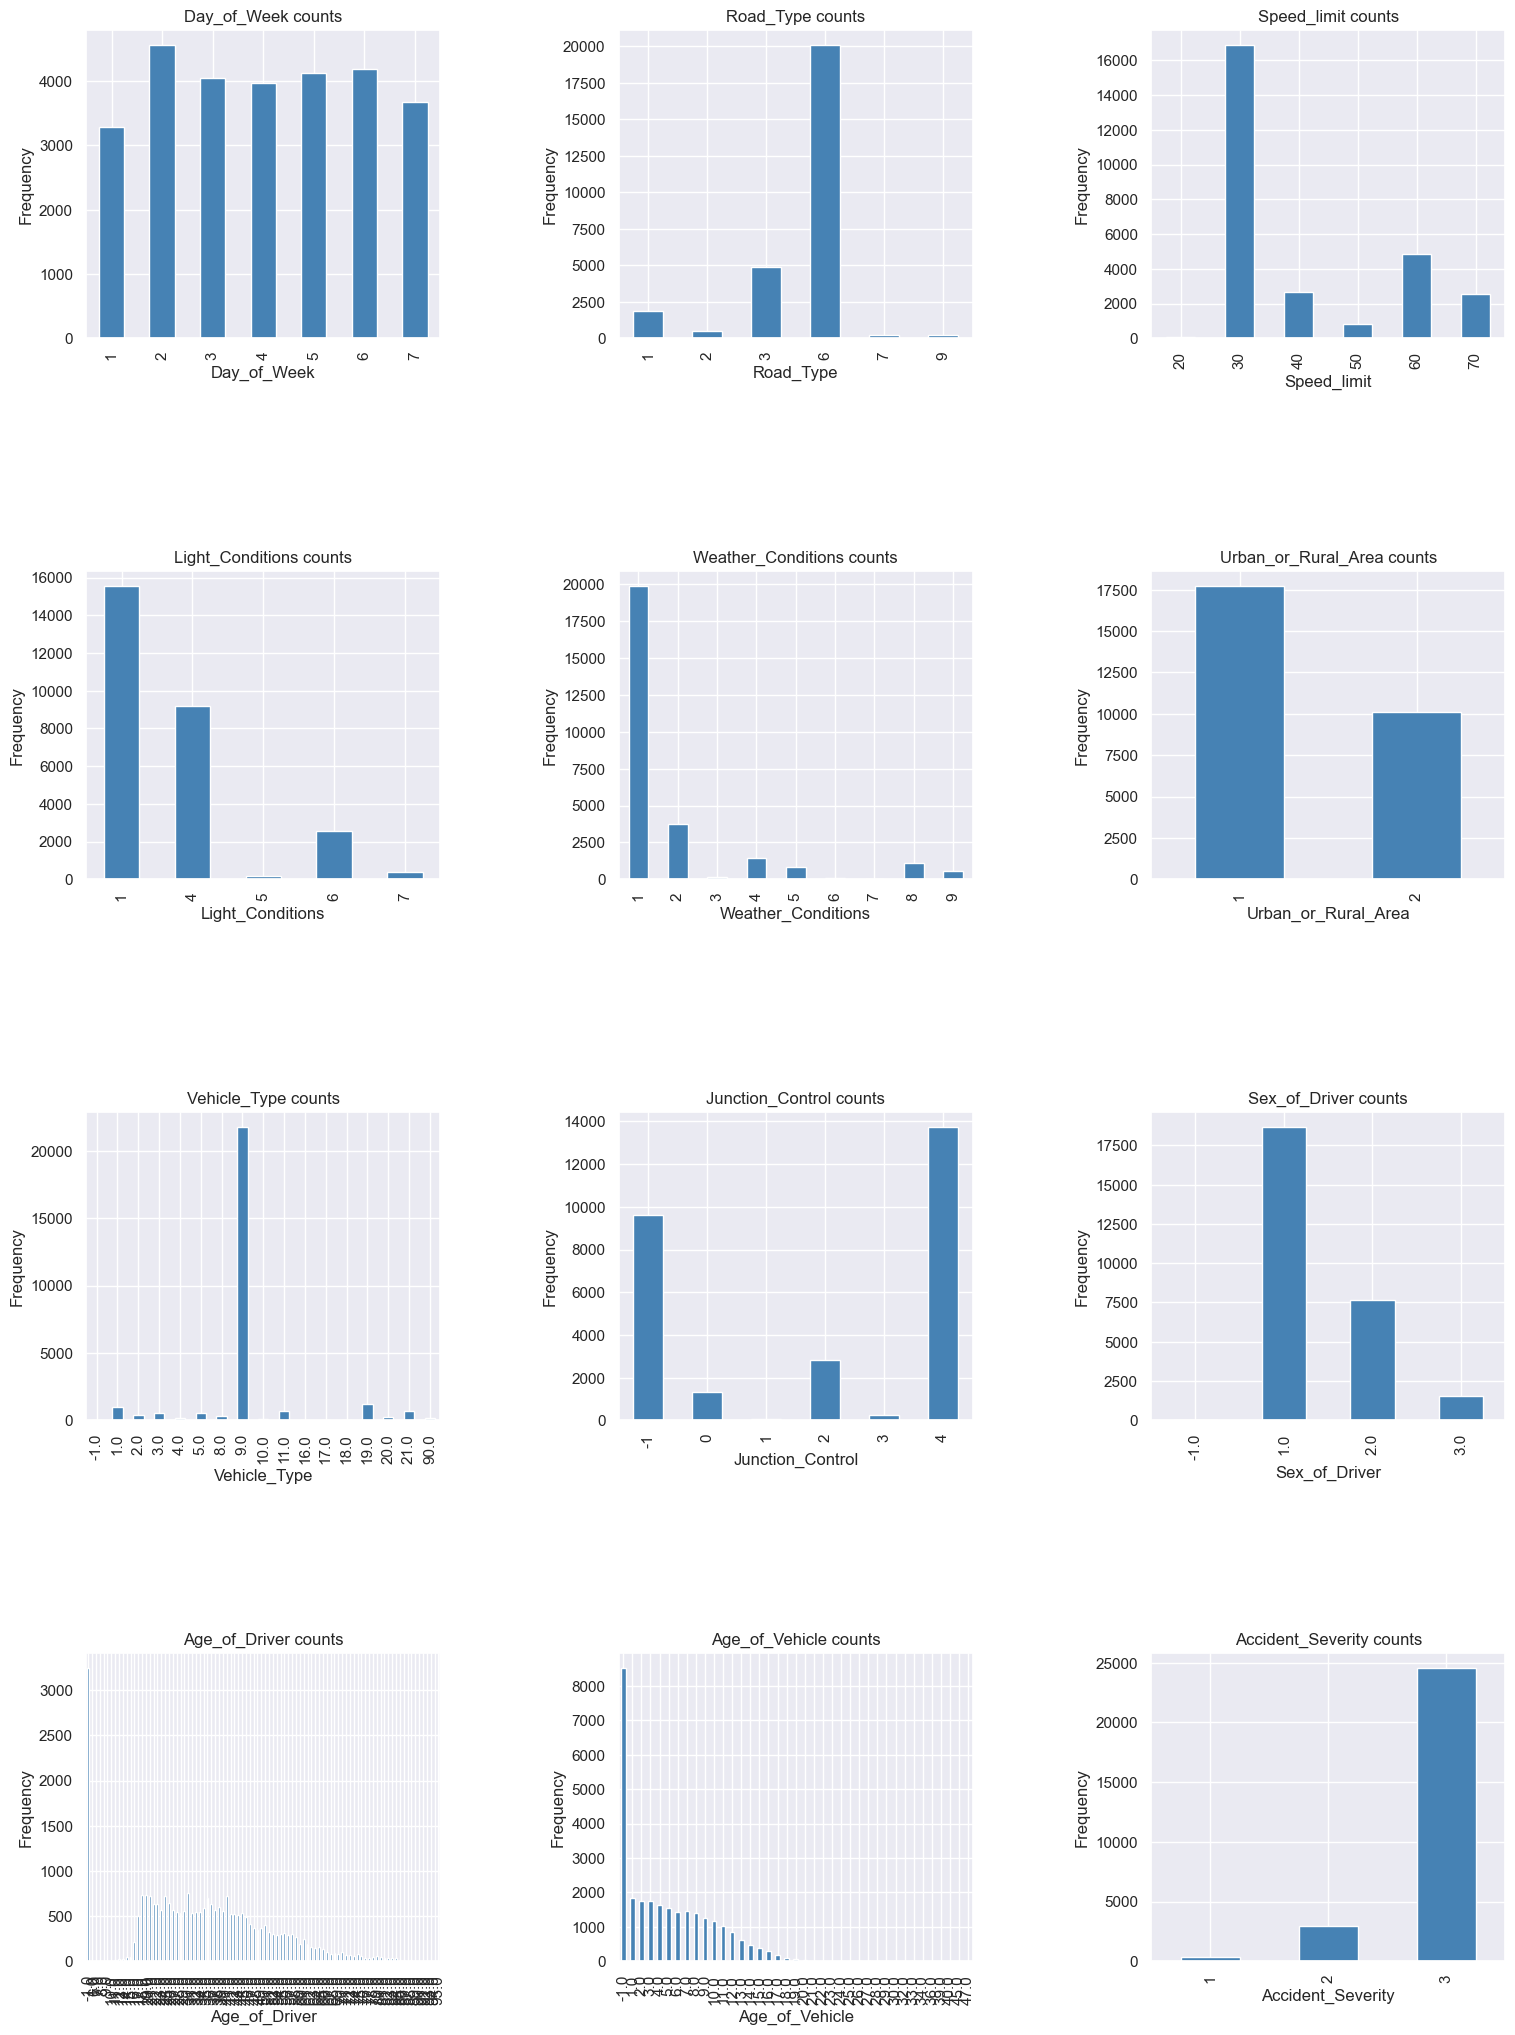

In [17]:
# Selected columns for bar charts analysis
selected_columns = ['Day_of_Week', 'Road_Type', 'Speed_limit', 'Light_Conditions', 
                    'Weather_Conditions', 'Urban_or_Rural_Area', #Target variable
                    'Vehicle_Type','Junction_Control', 'Sex_of_Driver', 'Age_of_Driver', 
                    'Age_of_Vehicle', 'Accident_Severity']

# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = -(-len(selected_columns) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Adjust layout
fig.tight_layout(h_pad=12, w_pad=8)

# Iterate through each selected column
for colnum, col in enumerate(selected_columns):
    counts = dataset1[col].value_counts().sort_index()
    
    # Access the current subplot using dynamic indexing based on the number of rows and columns
    ax = axes[colnum // num_cols][colnum % num_cols]
    
    counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_ylabel("Frequency")

# Display the overall figure with subplots
plt.show()

### CORRELATION 

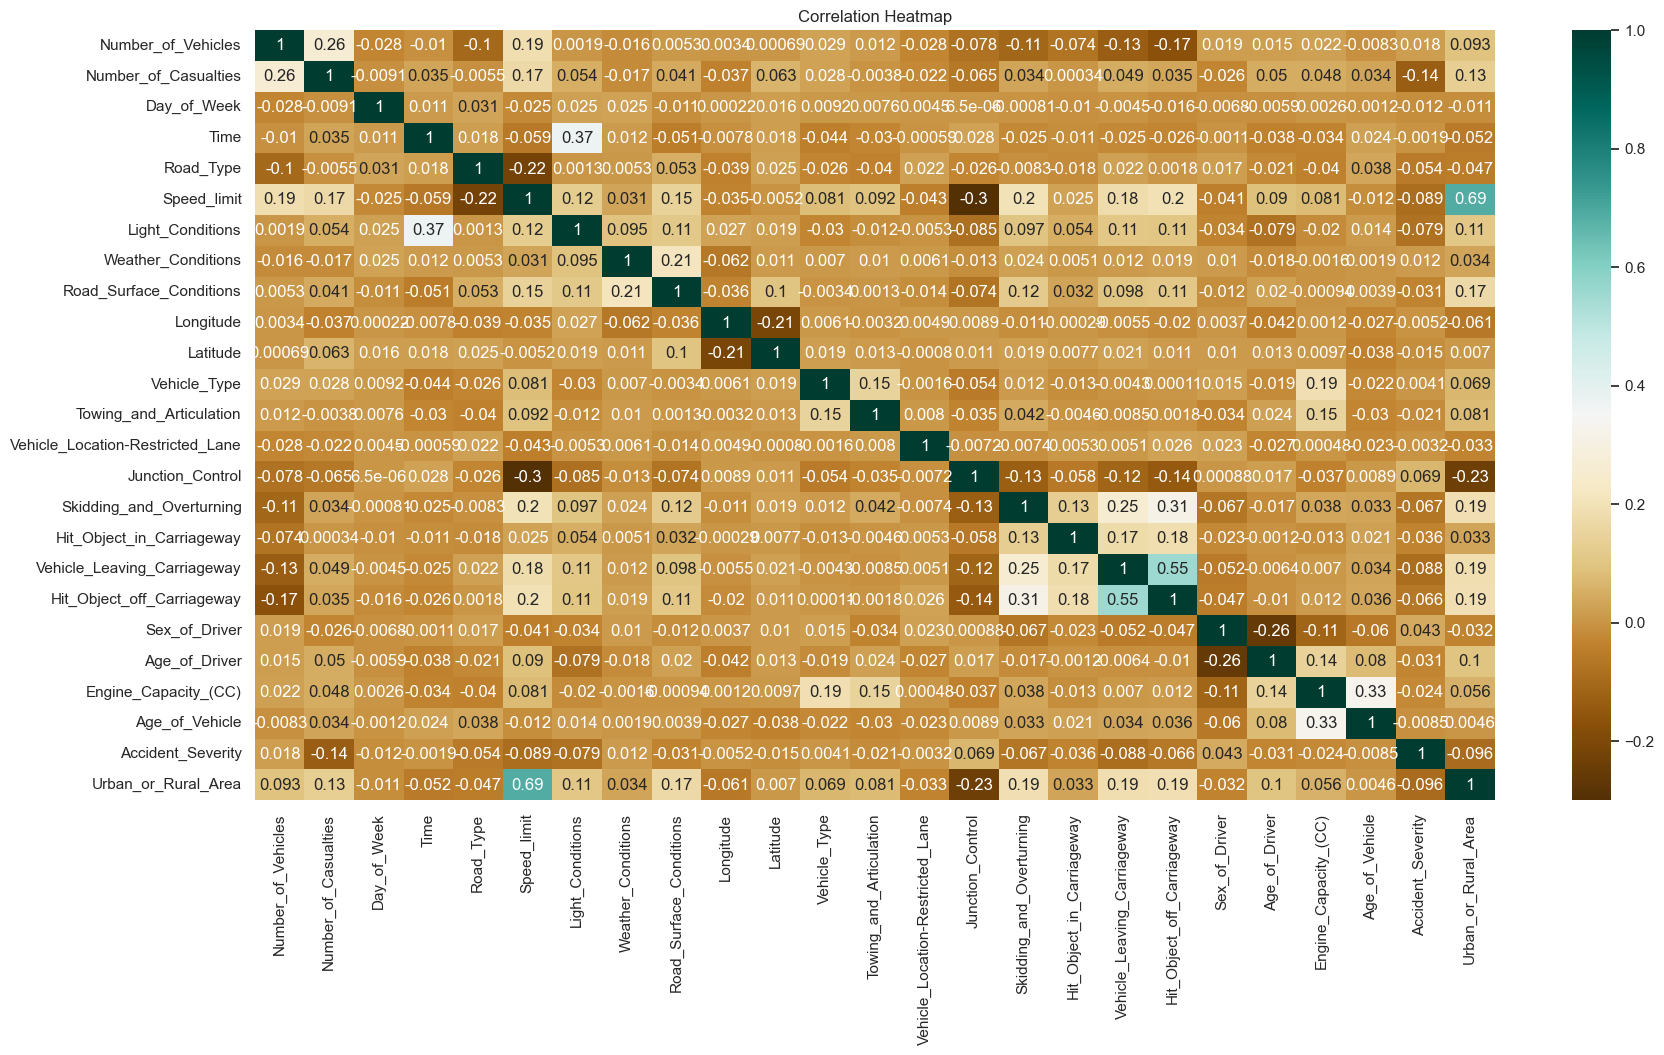

In [18]:
# Calculate the correlation matrix
numeric_columns = dataset1.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="BrBG")
plt.title("Correlation Heatmap")
# Show the plot
plt.show()

From the chart above, we can see that:

Our Target variable "'Urban_or_Rural_Area" have a positive correlaton of 0.69 with 'Speed_limit'  

There is a high correlation with **'Hit_Object_in_Carriageway' and 'Vehicle_Leaving_Carriageway' have a positive correlation of 0.55

Let's bettter visualize the correlation of the correlation with  **'Urban_or_Rural_Area' and 'Speed_limit'have which a positive correlation of 0.69 through a scatter plot


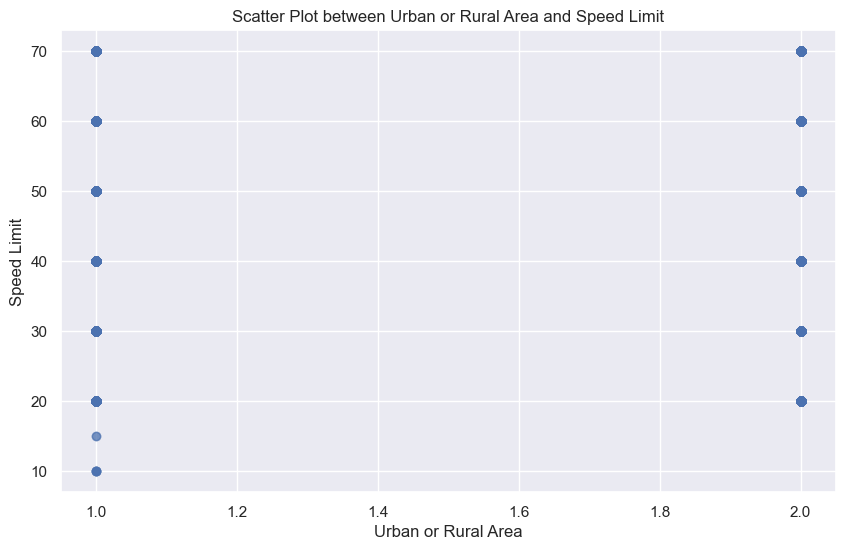

In [18]:

# Extracting the relevant columns
urban_or_rural_area = dataset['Urban_or_Rural_Area']
speed_limit = dataset['Speed_limit']

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(urban_or_rural_area, speed_limit, alpha=0.5)
plt.title('Scatter Plot between Urban or Rural Area and Speed Limit')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Speed Limit')
plt.grid(True)
plt.show()

In [19]:
# Extracting the relevant columns
urban_or_rural_area = dataset['Urban_or_Rural_Area']
speed_limit = dataset['Speed_limit']

# Create a DataFrame with the data
data = {'Urban_or_Rural_Area': urban_or_rural_area, 'Speed_limit': speed_limit}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


         Urban_or_Rural_Area  Speed_limit
0                          1           30
1                          1           30
2                          1           30
3                          1           30
4                          1           30
...                      ...          ...
2989211                    2           60
2989212                    2           60
2989213                    2           40
2989214                    2           40
2989215                    2           30

[2799585 rows x 2 columns]


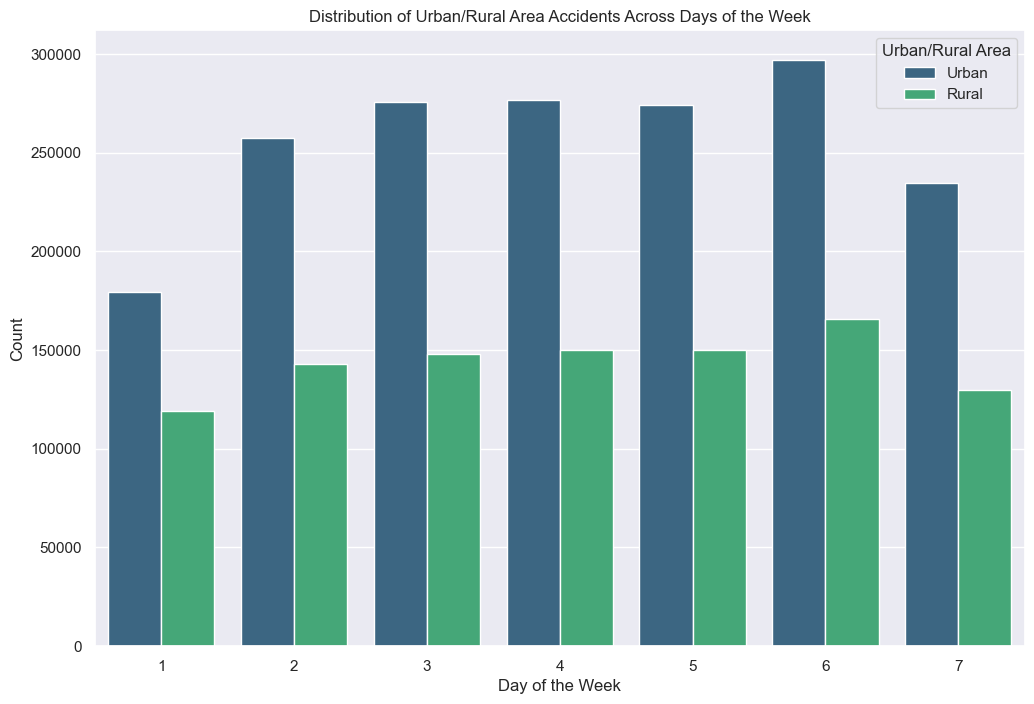

In [20]:
# Distribution of Urban/Rural Area Accidents Across Days of the Week

# Mapping for Urban_or_Rural_Area
area_mapping = {1: 'Urban', 2: 'Rural'}

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='Day_of_Week', hue='Urban_or_Rural_Area', data=dataset.replace({'Urban_or_Rural_Area': area_mapping}), palette='viridis')
plt.title('Distribution of Urban/Rural Area Accidents Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Urban/Rural Area', loc='upper right', labels=[area_mapping[i] for i in [1, 2]])
plt.show()


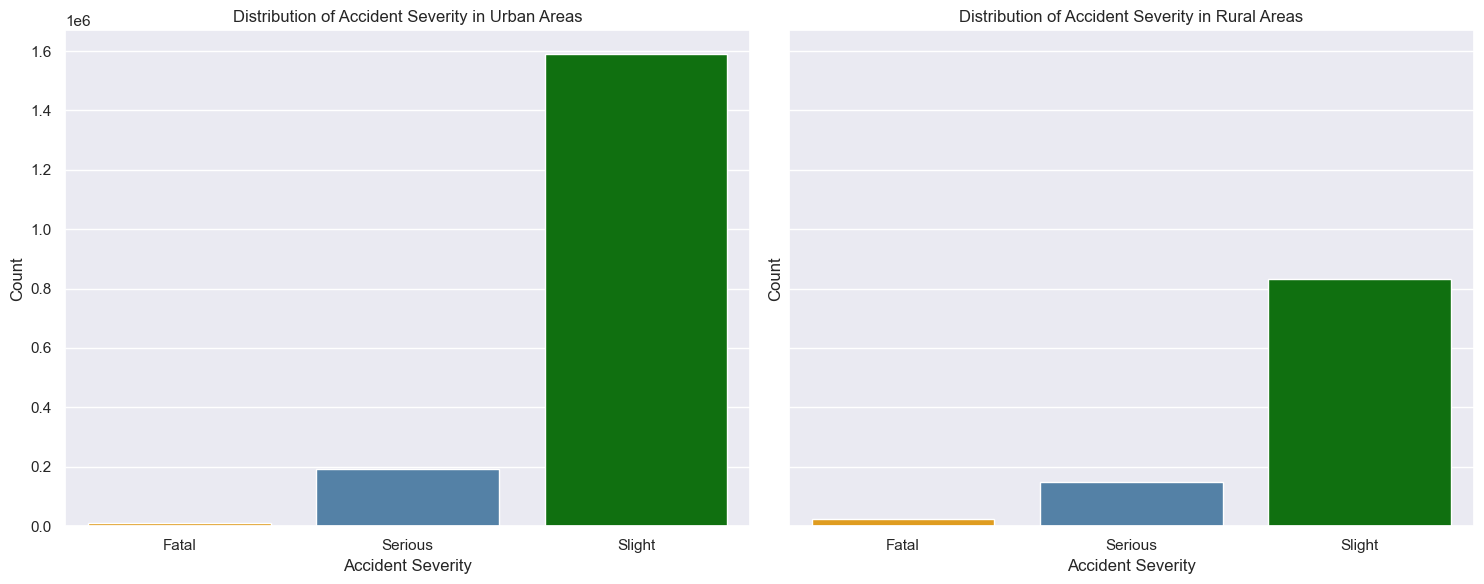

In [21]:
#Distribution of Accident Severity based on Urban/Rural Areas

# Mapping for Accident_Severity
severity_mapping = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}

# Mapping for Urban_or_Rural_Area
area_mapping = {1: 'Urban', 2: 'Rural'}

# Create two bar charts for Urban and Rural areas
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Urban Area
sns.countplot(x='Accident_Severity', data=dataset[dataset['Urban_or_Rural_Area'] == 1],
              palette=['orange', 'steelblue', 'green'], ax=axes[0])
axes[0].set_title('Distribution of Accident Severity in Urban Areas')
axes[0].set_xlabel('Accident Severity')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels([severity_mapping[i] for i in range(1, 4)])

# Rural Area
sns.countplot(x='Accident_Severity', data=dataset[dataset['Urban_or_Rural_Area'] == 2],
              palette=['orange', 'steelblue', 'green'], ax=axes[1])
axes[1].set_title('Distribution of Accident Severity in Rural Areas')
axes[1].set_xlabel('Accident Severity')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels([severity_mapping[i] for i in range(1, 4)])

# Adjust layout for better readability
plt.tight_layout()
plt.show()

#      

## DATA BALANCING

Let's take a closer look at our target variable "Urban_or_Rural_Area" through a bar chart 

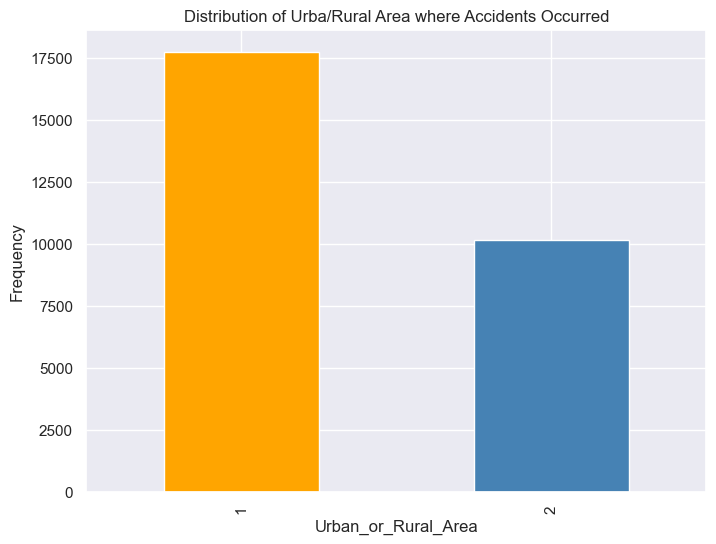

In [22]:

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Get value counts for the 'Urban_or_Rural_Area' column
counts = dataset1['Urban_or_Rural_Area'].value_counts().sort_index()

# Define colors for each category
colors = [ 'orange', 'steelblue']

# Plot the bar chart with different colors
counts.plot.bar(ax=ax, color=colors)
ax.set_title('Distribution of Urba/Rural Area where Accidents Occurred')
ax.set_ylabel("Frequency")

# Display the chart
plt.show()


In [23]:
# Display the count of each distinct value in the "Urban_or_Rural_Area" column
urban_rural_counts = dataset1['Urban_or_Rural_Area'].value_counts()

# Display the count values
print("Urban_or_Rural_Area Distinct Values Counts:")
print(urban_rural_counts)

area_mapping = {
    1: 'Urban',
    2: 'Rural',
}

print("area_mapping =", area_mapping)


Urban_or_Rural_Area Distinct Values Counts:
Urban_or_Rural_Area
1    17741
2    10130
Name: count, dtype: int64
area_mapping = {1: 'Urban', 2: 'Rural'}


#       

The distribution of the "Accident_Severity" classes is imbalanced, with a significantly higher number of instances in class 3 compared to classes 2 and 1. 


Balancing the data is essential for mitigating biases, ensuring fairness, and improving the predictive accuracy of the model, especially when dealing with imbalanced datasets where certain classes are underrepresented. This approach contributes to more robust and reliable machine learning models in scenarios where all classes are of equal importance.

In [24]:
from imblearn.over_sampling import SMOTE # Data Balancing Library 
from imblearn.under_sampling import RandomUnderSampler


# Separate features and target variable
x = dataset1[[col for col in dataset1 if col != 'Urban_or_Rural_Area']]
y = dataset1['Urban_or_Rural_Area']

# Calculate the desired number of samples for each class during oversampling
desired_samples = {
    1: int(0.5 * np.sum(y == 1)),
    2: int(0.5 * np.sum(y == 2)),
}

# Calculate the number of samples in each class
class_samples = {cls: np.sum(y == cls) for cls in np.unique(y)}

# Make sure the desired number of samples is greater than the original number of samples
for cls in np.unique(y):
    if desired_samples[cls] <= class_samples[cls]:
        desired_samples[cls] = class_samples[cls] + 1  # Set it to one more than the original

# Oversample the minority class using SMOTE
smote = SMOTE(sampling_strategy=desired_samples, random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

# Undersample the majority class to achieve an overall balanced dataset
undersample_strategy = {cls: int(np.min(np.unique(y_smote, return_counts=True)[1]) * 1.0) for cls in np.unique(y_smote)}
undersampler = RandomUnderSampler(sampling_strategy=undersample_strategy)
x_final, y_final = undersampler.fit_resample(x_smote, y_smote)

# Create a balanced dataset
balanced_dataset = pd.DataFrame(x_final, columns=x.columns)
balanced_dataset['Urban_or_Rural_Area'] = y_final  # Corrected target variable name

balanced_dataset.head()


,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Longitude,...,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Urban_or_Rural_Area
25723,2,1,3,1110,6,30,4,4,1,-2.241885,...,0.0,0.0,0.0,0.0,1.0,25.0,1905.0,9.0,3,1
345,2,2,6,930,6,30,1,2,2,-0.106696,...,0.0,0.0,0.0,0.0,1.0,58.0,-1.0,-1.0,3,1
2254,2,1,5,978,6,30,4,1,1,-0.193199,...,0.0,0.0,0.0,0.0,1.0,38.0,2494.0,12.0,3,1
11494,2,1,3,480,6,30,4,1,1,-1.357517,...,0.0,0.0,0.0,0.0,3.0,-1.0,-1.0,-1.0,3,1
6535,2,1,2,465,3,40,4,4,1,-2.279379,...,0.0,0.0,0.0,0.0,3.0,-1.0,-1.0,-1.0,3,1


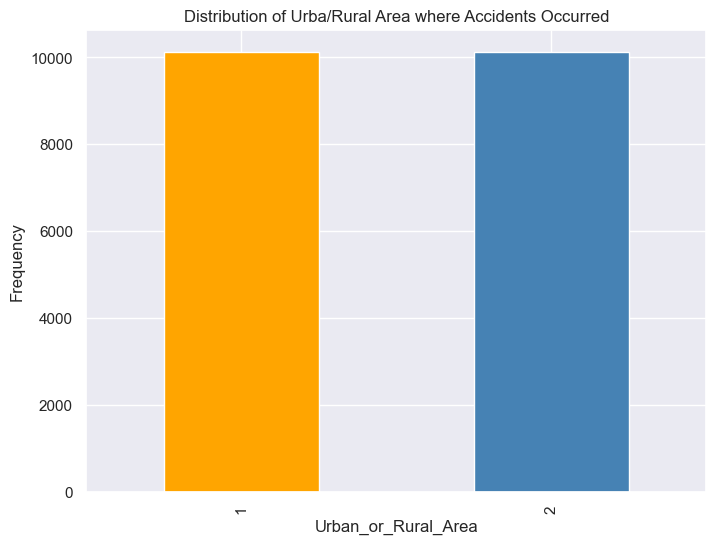

In [25]:
# Plot the "Urban_or_Rural_Area" distribution after balancing


# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Get value counts for the 'Accident_Severity' column
counts = balanced_dataset['Urban_or_Rural_Area'].value_counts().sort_index()

# Define colors for each category
colors = ['orange', 'steelblue']

# Plot the bar chart with different colors
counts.plot.bar(ax=ax, color=colors)
ax.set_title('Distribution of Urba/Rural Area where Accidents Occurred')
ax.set_ylabel("Frequency")

# Display the chart
plt.show()


In [26]:
# Display the count of each distinct value in the "Accident_Severity" column after data balancing
urban_rural_counts = balanced_dataset['Urban_or_Rural_Area'].value_counts()


# Display the count values
print("Urban_or_Rural_Area Distinct Values Counts after Data Balancing:")
print(urban_rural_counts)

area_mapping = {
    1: 'Urban',
    2: 'Rural',
}

print("area_mapping =", area_mapping)

Urban_or_Rural_Area Distinct Values Counts after Data Balancing:
Urban_or_Rural_Area
1    10131
2    10131
Name: count, dtype: int64
area_mapping = {1: 'Urban', 2: 'Rural'}


This balancing ensures that the machine learning model is less likely to be biased toward the majority class (Slight incidents) and can potentially improve the model's performance on predicting the minority classes (Fatal and Serious incidents). 

In [27]:
balanced_dataset.shape

(20262, 25)

In [28]:
balanced_dataset.head()

,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Longitude,...,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Urban_or_Rural_Area
25723,2,1,3,1110,6,30,4,4,1,-2.241885,...,0.0,0.0,0.0,0.0,1.0,25.0,1905.0,9.0,3,1
345,2,2,6,930,6,30,1,2,2,-0.106696,...,0.0,0.0,0.0,0.0,1.0,58.0,-1.0,-1.0,3,1
2254,2,1,5,978,6,30,4,1,1,-0.193199,...,0.0,0.0,0.0,0.0,1.0,38.0,2494.0,12.0,3,1
11494,2,1,3,480,6,30,4,1,1,-1.357517,...,0.0,0.0,0.0,0.0,3.0,-1.0,-1.0,-1.0,3,1
6535,2,1,2,465,3,40,4,4,1,-2.279379,...,0.0,0.0,0.0,0.0,3.0,-1.0,-1.0,-1.0,3,1


#     

# DATA SCALING

Data scaling is crucial in machine learning to ensure fair feature contributions, accelerate convergence, boost algorithm performance, prevent numerical instabilities, and enable effective regularization. Data scaling typically involves transforming numerical values in a dataset to a standard scale, often ranging from 0 to 1, to ensure uniformity and facilitate comparisons between different features.

In [29]:
from sklearn.preprocessing import MinMaxScaler  #scikit-learn library for feature scaling

# Creating a copy of the balanced dataset
scaled_dataset = balanced_dataset.copy()

# Extracting features (X_bal) and target variable (y_bal)
X_bal = scaled_dataset.drop('Urban_or_Rural_Area', axis=1)
y_bal = scaled_dataset['Urban_or_Rural_Area']

# Applying Min-Max scaling to features
scaler = MinMaxScaler()
X_bal_scaled = scaler.fit_transform(X_bal)

# Updating the features in the scaled dataset
scaled_dataset[X_bal.columns] = X_bal_scaled

In [30]:
#Balanced Dataset Overview after Data Scaling
scaled_dataset.head()

,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Longitude,...,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Urban_or_Rural_Area
25723,0.1,0.0000,0.333333,0.771210,0.625,0.2,0.5,0.375,0.333333,0.504451,...,0.0,0.076923,0.0,0.0,0.5,0.273684,0.118209,0.208333,1.0,1
345,0.1,0.0625,0.833333,0.646036,0.625,0.2,0.0,0.125,0.500000,0.769186,...,0.0,0.076923,0.0,0.0,0.5,0.621053,0.000000,0.000000,1.0,1
2254,0.1,0.0000,0.666667,0.679416,0.625,0.2,0.5,0.000,0.333333,0.758461,...,0.0,0.076923,0.0,0.0,0.5,0.410526,0.154738,0.270833,1.0,1
11494,0.1,0.0000,0.333333,0.333102,0.625,0.2,0.5,0.000,0.333333,0.614100,...,0.0,0.076923,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,1
6535,0.1,0.0000,0.166667,0.322670,0.250,0.4,0.5,0.375,0.333333,0.499802,...,0.0,0.076923,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,1


In [31]:
scaled_dataset.shape

(20262, 25)

# DATA MODELLING


Data modeling involves creating a simplified representation of a real-world system or process to gain insights, make predictions, or support decision-making in various fields such as business, science, and technology.

For this case study we will conduct SVM, NN and LG Models

In [32]:
# For SVM and Logistic Regression
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC                           #For Support Vector Machine
from sklearn.linear_model import LogisticRegression   #For LogisticRegression
from sklearn.neural_network import MLPClassifier      #For Neural Network


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score


In [33]:
#split dataset into input variable X and target variable y
X = scaled_dataset.drop('Urban_or_Rural_Area', axis=1)


#check that the class variable has been removed
X.head()

,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Longitude,...,Junction_Control,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity
25723,0.1,0.0000,0.333333,0.771210,0.625,0.2,0.5,0.375,0.333333,0.504451,...,1.0,0.0,0.076923,0.0,0.0,0.5,0.273684,0.118209,0.208333,1.0
345,0.1,0.0625,0.833333,0.646036,0.625,0.2,0.0,0.125,0.500000,0.769186,...,0.0,0.0,0.076923,0.0,0.0,0.5,0.621053,0.000000,0.000000,1.0
2254,0.1,0.0000,0.666667,0.679416,0.625,0.2,0.5,0.000,0.333333,0.758461,...,0.6,0.0,0.076923,0.0,0.0,0.5,0.410526,0.154738,0.270833,1.0
11494,0.1,0.0000,0.333333,0.333102,0.625,0.2,0.5,0.000,0.333333,0.614100,...,1.0,0.0,0.076923,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0
6535,0.1,0.0000,0.166667,0.322670,0.250,0.4,0.5,0.375,0.333333,0.499802,...,0.0,0.0,0.076923,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0


In [34]:
#separate target variable 
y = scaled_dataset['Urban_or_Rural_Area']

#view target values
print(y[0:5])

25723    1
345      1
2254     1
11494    1
6535     1
Name: Urban_or_Rural_Area, dtype: int64


In [35]:
# Split dataset into training set and test set: 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

(14183, 24)
(14183,)


### Support Vector Machine (SVM) Model

In [36]:
# Create and train the SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [38]:
# Predictions
svm_predictions = svm_model.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8373087678894555


In [37]:
# Create and train the second SVM Model
svm_model2 = SVC(kernel='rbf', C=10)
svm_model2.fit(X_train, y_train)


SVC(C=10)

In [40]:
# Predictions
svm_predictions2 = svm_model2.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions2)
print("SVM Accuracy:", svm_accuracy)


#Precision
svm_precision = precision_score(y_test, svm_predictions2, average=None)
print("SVM Precision:", svm_precision)


# SVM Model
svm_recall = recall_score(y_test, svm_predictions, average=None)
print("SVM Recall (Sensitivity):", svm_recall)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_predictions2)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, svm_predictions2)
print("\nClassification Report:")
print(class_report)

SVM Accuracy: 0.8433952952788287
SVM Precision: [0.80811049 0.88826607]
SVM Recall (Sensitivity): [0.92423745 0.74983498]

Confusion Matrix:
[[2750  299]
 [ 653 2377]]

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.90      0.85      3049
           2       0.89      0.78      0.83      3030

    accuracy                           0.84      6079
   macro avg       0.85      0.84      0.84      6079
weighted avg       0.85      0.84      0.84      6079



### Neural Network Model

In [38]:
# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
nn_model.fit(X_train, y_train)


MLPClassifier(max_iter=500)

In [42]:
# Predictions
nn_predictions = nn_model.predict(X_test)

# Accuracy
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("Neural Network Accuracy:", nn_accuracy)

#Precision
nn_precision = precision_score(y_test, nn_predictions, average=None)
print("Neural Network Precision:", nn_precision)


# Neural Network Model
nn_recall = recall_score(y_test, nn_predictions, average=None)
print("\nNeural Network Recall (Sensitivity):", nn_recall)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, nn_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, nn_predictions)
print("\nClassification Report:")
print(class_report)

Neural Network Accuracy: 0.8381312715907222
Neural Network Precision: [0.81183932 0.86958092]

Neural Network Recall (Sensitivity): [0.88160052 0.79438944]

Confusion Matrix:
[[2688  361]
 [ 623 2407]]

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.88      0.85      3049
           2       0.87      0.79      0.83      3030

    accuracy                           0.84      6079
   macro avg       0.84      0.84      0.84      6079
weighted avg       0.84      0.84      0.84      6079



### Logistic Regression Model

In [39]:
# Logistic Regression Model
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
# Predictions
lg_predictions = lg_model.predict(X_test)

# Accuracy
lg_accuracy = accuracy_score(y_test, lg_predictions)
print("Logistic Regression Accuracy:", lg_accuracy)

#Precision
lg_precision = precision_score(y_test, lg_predictions, average=None)
print("Logistic Regression Precision:", lg_precision)


# Logistic Regression Model
lg_recall = recall_score(y_test, lg_predictions, average=None)
print("\nLogistic Regression Recall (Sensitivity):", lg_recall)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, lg_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, lg_predictions)
print("\nClassification Report:")
print(class_report)

Logistic Regression Accuracy: 0.8313867412403356
Logistic Regression Precision: [0.78555305 0.89546351]

Logistic Regression Recall (Sensitivity): [0.91308626 0.74917492]

Confusion Matrix:
[[2784  265]
 [ 760 2270]]

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.91      0.84      3049
           2       0.90      0.75      0.82      3030

    accuracy                           0.83      6079
   macro avg       0.84      0.83      0.83      6079
weighted avg       0.84      0.83      0.83      6079



# MODEL TUNING

Model tuning is an effective phase in the machine learning pipeline that involves optimizing the hyperparameters of a predictive model to enhance its performance on a specific task

Performing multiple rounds of tuning for each model can be beneficial, especially if aiming to fine-tune the hyperparameters further and explore the parameter space more comprehensively.

In [47]:
scaled_dataset.columns

Index(['Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Time',
       'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Longitude', 'Latitude', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Location-Restricted_Lane',
       'Junction_Control', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', 'Sex_of_Driver', 'Age_of_Driver',
       'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Accident_Severity',
       'Urban_or_Rural_Area'],
      dtype='object')

###    

## SVM Model Tuning

##### First SVM Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Create the SVM model
svm_model = SVC()

# Perform grid search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters (First Round):", best_params)


Best Hyperparameters (First Round): {'C': 10, 'kernel': 'rbf'}


In [49]:
# Create and train the SVM model with best hyperparameters
best_svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'])
best_svm_model.fit(X_train, y_train)

# Predictions
svm_predictions_first_round = best_svm_model.predict(X_test)

# Accuracy
svm_accuracy_first_round = accuracy_score(y_test, svm_predictions_first_round)
print("SVM Accuracy (First Round):", svm_accuracy_first_round)

# Precision
svm_precision_first_round = precision_score(y_test, svm_predictions_first_round, average=None)
print("SVM Precision (First Round):", svm_precision_first_round)

# Recall
svm_recall_first_round = recall_score(y_test, svm_predictions_first_round, average=None)
print("SVM Recall (First Round):", svm_recall_first_round)

# Confusion Matrix
conf_matrix_first_round = confusion_matrix(y_test, svm_predictions_first_round)
print("\nConfusion Matrix (First Round):")
print(conf_matrix_first_round)


SVM Accuracy (First Round): 0.8486593189669354
SVM Precision (First Round): [0.81747689 0.88701394]
SVM Recall (First Round): [0.89898327 0.7980198 ]

Confusion Matrix (First Round):
[[2741  308]
 [ 612 2418]]


#     

##### Second SVM Tuning

In [50]:
# Define the refined hyperparameter grid for the second tunning round
param_grid_refined = {'C': [1, 5, 10, 20, 30, 40], 'kernel': ['poly'], 'degree': [2, 3, 4], 'coef0': [0.0, 0.1, 0.5], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced']}

# Perform refined grid search for the second round
grid_search_refined = GridSearchCV(svm_model, param_grid_refined, cv=5, scoring='accuracy')
grid_search_refined.fit(X_train, y_train)

# Display the best refined hyperparameters for the second round
best_params_refined_second_round = grid_search_refined.best_params_
print("Best Refined Hyperparameters (Second Round):", best_params_refined_second_round)

Best Refined Hyperparameters (Second Round): {'C': 20, 'kernel': 'poly', 'degree': 3, 'coef0': 0.1, 'gamma': 'scale', 'class_weight': 'balanced'}


In [52]:
# Create and train the SVM model with refined best hyperparameters for the second tunning
best_svm_model_second_round = SVC(**best_params_refined_second_round)
best_svm_model_second_round.fit(X_train, y_train)

# Predictions
svm_predictions_second_round = best_svm_model_second_round.predict(X_test)

# Accuracy
svm_accuracy_second_round = accuracy_score(y_test, svm_predictions_second_round)
print("SVM Accuracy (Second SVM Round):", svm_accuracy_second_round)

# Precision
svm_precision_second_round = precision_score(y_test, svm_predictions_second_round, average=None)
print("SVM Precision (Second SVM Round):", svm_precision_second_round)

# Recall
svm_recall_second_round = recall_score(y_test, svm_predictions_second_round, average=None)
print("SVM Recall (Second SVM Round):", svm_recall_second_round)

# Confusion Matrix
conf_matrix_second_round = confusion_matrix(y_test, svm_predictions_second_round)
print("\nConfusion Matrix (Second SVM Round):")
print(conf_matrix_second_round)

SVM Accuracy (Second SVM Round): 0.8453693041618687
SVM Precision (Second SVM Round): [0.81524664 0.88222385]
SVM Recall (Second SVM Round): [0.8943916 0.7960396]

Confusion Matrix (Second SVM Round):
[[2727  322]
 [ 618 2412]]


#    

## NN Model Tuning

##### First NN Tuning

In [53]:
# Define the hyperparameter grid for the first round
param_grid_first_round = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'max_iter': [500, 1000, 1500],
    'activation': ['logistic', 'tanh', 'relu'],
}

# Create the NN model
nn_model_first_round = MLPClassifier()

# Perform grid search for the first round
grid_search_first_round = GridSearchCV(nn_model_first_round, param_grid_first_round, cv=5, scoring='accuracy')
grid_search_first_round.fit(X_train, y_train)

# Display the best hyperparameters for the first round
best_params_first_round = grid_search_first_round.best_params_
print("Best Hyperparameters (First NN Round):", best_params_first_round)

Best Hyperparameters (First NN Round): {'hidden_layer_sizes': (500,), 'max_iter': 1000, 'activation': 'relu'}


In [55]:
# Create and train the NN model with best hyperparameters for the first round
best_nn_model_first_round = MLPClassifier(**best_params_first_round)
best_nn_model_first_round.fit(X_train, y_train)

# Predictions
nn_predictions_first_round = best_nn_model_first_round.predict(X_test)

# Accuracy
nn_accuracy_first_round = accuracy_score(y_test, nn_predictions_first_round)
print("NN Accuracy (First NN Round):", nn_accuracy_first_round)

# Precision
nn_precision_first_round = precision_score(y_test, nn_predictions_first_round, average=None)
print("NN Precision (First NN  Round):", nn_precision_first_round)

# Recall
nn_recall_first_round = recall_score(y_test, nn_predictions_first_round, average=None)
print("NN Recall (First NN Round):", nn_recall_first_round)

# Confusion Matrix
conf_matrix_first_round = confusion_matrix(y_test, nn_predictions_first_round)
print("\nConfusion Matrix (First NN Round):")
print(conf_matrix_first_round)

NN Accuracy (First NN Round): 0.8351702582661622
NN Precision (First NN Round): [0.81716765 0.85553997]
NN Recall (First NN Round): [0.86487373 0.80528053]

Confusion Matrix (First NN Round):
[[2637  412]
 [ 590 2440]]


#   

##### Second NN Tuning

In [56]:
# Define the refined hyperparameter grid for the second round
param_grid_second_round = {
    'hidden_layer_sizes': [(100,), (150,), (200,)],
    'max_iter': [1000, 1500, 2000],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Perform refined grid search for the second round
grid_search_second_round = GridSearchCV(nn_model_first_round, param_grid_second_round, cv=5, scoring='accuracy')
grid_search_second_round.fit(X_train, y_train)

# Display the best refined hyperparameters for the second round
best_params_second_round = grid_search_second_round.best_params_
print("Best Refined Hyperparameters (Second NN Round):", best_params_second_round)


Best Refined Hyperparameters (Second NN Round): {'hidden_layer_sizes': (150,), 'max_iter': 1000, 'activation': 'logistic', 'alpha': 0.001}


In [57]:
# Create and train the NN model with refined best hyperparameters for the second round
best_nn_model_second_round = MLPClassifier(**best_params_second_round)
best_nn_model_second_round.fit(X_train, y_train)

# Predictions
nn_predictions_second_round = best_nn_model_second_round.predict(X_test)

# Accuracy
nn_accuracy_second_round = accuracy_score(y_test, nn_predictions_second_round)
print("NN Accuracy (Second NN Round):", nn_accuracy_second_round)

# Precision
nn_precision_second_round = precision_score(y_test, nn_predictions_second_round, average=None)
print("NN Precision (Second NN Round):", nn_precision_second_round)

# Recall
nn_recall_second_round = recall_score(y_test, nn_predictions_second_round, average=None)
print("NN Recall (Second NN Round):", nn_recall_second_round)

# Confusion Matrix
conf_matrix_second_round = confusion_matrix(y_test, nn_predictions_second_round)
print("\nConfusion Matrix (Second NN Round):")
print(conf_matrix_second_round)

NN Accuracy (Second NN Round): 0.8371442671492022
NN Precision (Second NN Round): [0.7988389  0.88724374]
NN Recall (Second NN Round): [0.90259101 0.77128713]

Confusion Matrix (Second NN Round):
[[2752  297]
 [ 693 2337]]


#     

## Logistic Regression Tuning 

###     

##### Logistic Regression First Tunning

In [59]:
# Define the hyperparameter grid for the first round
param_grid_first_round = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

# Create the Logistic Regression model
lg_model_first_round = LogisticRegression(max_iter=1000)

# Perform grid search for the first round
grid_search_first_round = GridSearchCV(lg_model_first_round, param_grid_first_round, cv=5, scoring='accuracy')
grid_search_first_round.fit(X_train, y_train)

# Display the best hyperparameters for the first round
best_params_first_round = grid_search_first_round.best_params_
print("Best Hyperparameters (First LG Round):", best_params_first_round)


Best Hyperparameters (First LG Round): {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


C:\Users\User\anaconda_3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda_3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda_3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda_3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver =

In [60]:
# Create and train the Logistic Regression model with best hyperparameters for the first round
best_lg_model_first_round = LogisticRegression(**best_params_first_round, max_iter=1000)
best_lg_model_first_round.fit(X_train, y_train)

# Predictions
lg_predictions_first_round = best_lg_model_first_round.predict(X_test)

# Accuracy
lg_accuracy_first_round = accuracy_score(y_test, lg_predictions_first_round)
print("Logistic Regression Accuracy (First LG Round):", lg_accuracy_first_round)

# Precision
lg_precision_first_round = precision_score(y_test, lg_predictions_first_round, average=None)
print("Logistic Regression Precision (First LG Round):", lg_precision_first_round)

# Recall
lg_recall_first_round = recall_score(y_test, lg_predictions_first_round, average=None)
print("Logistic Regression Recall (First LG Round):", lg_recall_first_round)

# Confusion Matrix
conf_matrix_first_round = confusion_matrix(y_test, lg_predictions_first_round)
print("\nConfusion Matrix (First LG Round):")
print(conf_matrix_first_round)

Logistic Regression Accuracy (First LG Round): 0.8313867412403356
Logistic Regression Precision (First LG Round): [0.78603731 0.89452971]
Logistic Regression Recall (First LG Round): [0.91210233 0.75016502]

Confusion Matrix (First LG Round):
[[2781  268]
 [ 757 2273]]


##### Logistic Regression Second Tunning

In [61]:
# Define the refined hyperparameter grid for the second round
param_grid_second_round = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10, 20, 30],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
}

# Perform refined grid search for the second round
grid_search_second_round = GridSearchCV(lg_model_first_round, param_grid_second_round, cv=5, scoring='accuracy')
grid_search_second_round.fit(X_train, y_train)

# Display the best refined hyperparameters for the second round
best_params_second_round = grid_search_second_round.best_params_
print("Best Refined Hyperparameters (Second LG Round):", best_params_second_round)


C:\Users\User\anaconda_3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda_3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda_3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda_3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver =

Best Refined Hyperparameters (Second LG Round): {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [62]:
# Create and train the Logistic Regression model with refined best hyperparameters for the second round
best_lg_model_second_round = LogisticRegression(**best_params_second_round, max_iter=1000)
best_lg_model_second_round.fit(X_train, y_train)

# Predictions
lg_predictions_second_round = best_lg_model_second_round.predict(X_test)

# Accuracy
lg_accuracy_second_round = accuracy_score(y_test, lg_predictions_second_round)
print("Logistic Regression Accuracy (Second LG Round):", lg_accuracy_second_round)

# Precision
lg_precision_second_round = precision_score(y_test, lg_predictions_second_round, average=None)
print("Logistic Regression Precision (Second LG Round):", lg_precision_second_round)

# Recall
lg_recall_second_round = recall_score(y_test, lg_predictions_second_round, average=None)
print("Logistic Regression Recall (Second LG Round):", lg_recall_second_round)

# Confusion Matrix
conf_matrix_second_round = confusion_matrix(y_test, lg_predictions_second_round)
print("\nConfusion Matrix (Second LG Round):")
print(conf_matrix_second_round)

Logistic Regression Accuracy (Second LG Round): 0.8315512419805889
Logistic Regression Precision (Second LG Round): [0.7854525  0.89612954]
Logistic Regression Recall (Second LG Round): [0.91374221 0.74884488]

Confusion Matrix (Second LG Round):
[[2786  263]
 [ 761 2269]]
